In [1]:
import os

import numpy as np
import pandas as pd
import rasterio as rio
import matplotlib.pyplot as plt

In [2]:
data_dirs = [os.path.join("../data/",x) for x in os.listdir("../data/") if not x.endswith(".zip")]

In [3]:
all_dat = {}

for i in data_dirs:
    files = [os.path.join(i,x) for x in sorted(os.listdir(i))]
    all_dat[os.path.split(i)[1]] = files

In [4]:
x_2d = all_dat['SSEBop'][0]
y_2d = all_dat['ALEXI'][0]
z_2d = all_dat['MOD16'][0]

In [5]:
xarr = rio.open(x_2d).read(1)
yarr = rio.open(y_2d).read(1)
zarr = rio.open(z_2d).read(1)

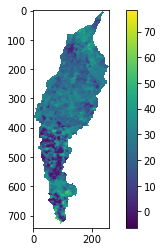

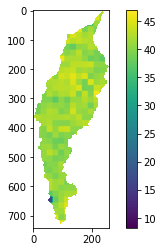

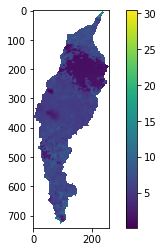

In [6]:
plt.imshow(xarr); plt.colorbar();plt.show()
plt.imshow(yarr); plt.colorbar();plt.show()
plt.imshow(zarr); plt.colorbar(); plt.show()

In [7]:
xarr.shape, yarr.shape, zarr.shape

((742, 258), (742, 258), (742, 258))

In [8]:
len(files)

6

In [9]:
ts_dat = {}

for key in all_dat.keys():
    print(key)
    for fn in range(len(files)):
        x3d = np.dstack([rio.open(x).read(1) for x in all_dat[key]])
        ts_dat[key] = x3d

SSEBop
WaPOR
ALEXI
MOD16
CMRSET
SEBAL


In [10]:
ts_dat['SSEBop'][0].shape

(258, 6)

In [11]:
def calc_tc_error(x,y,z):
    '''
    calculate errors between triplets
    '''
    e_x = np.sqrt(np.abs(np.mean((x - y) * (x - z))))
    e_y = np.sqrt(np.abs(np.mean((y - x) * (y - z))))
    e_z = np.sqrt(np.abs(np.mean((z - x) * (z - y))))

    return e_x, e_y, e_z

def scale_to_ref(src, ref):
    '''
    scale one dataset to another (mean / std)
    '''
    return ((src - np.nanmean(src)) / np.nanstd(src)) * np.nanstd(ref) + np.nanmean(ref)


# Will want to make all triplet combos of these data. 

# I have demonstrated on 3
outim_x = np.zeros_like(ts_dat['SSEBop'][:,:,0])
outim_y = np.zeros_like(ts_dat['ALEXI'][:,:,0])
outim_z = np.zeros_like(ts_dat['MOD16'][:,:,0])

for i in range(outim_x.shape[0]):
    for j in range(outim_x.shape[1]):
        xvals = ts_dat['SSEBop'][i,j,:]
        yvals = ts_dat['ALEXI'][i,j,:]
        zvals = ts_dat['MOD16'][i,j,:]
        
        e_x, e_y, e_z = calc_tc_error(xvals,scale_to_ref(yvals,xvals),scale_to_ref(zvals,xvals))
        
        outim_x[i,j] = e_x
        outim_y[i,j] = e_y
        outim_z[i,j] = e_z

<ipython-input-11-41803f8982f6>:15: RuntimeWarning: Mean of empty slice
  return ((src - np.nanmean(src)) / np.nanstd(src)) * np.nanstd(ref) + np.nanmean(ref)
/Users/aakashahamed/anaconda3/envs/rsenv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


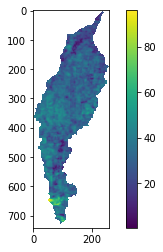

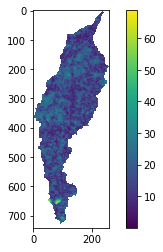

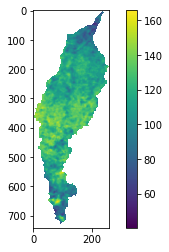

In [12]:
plt.imshow(outim_x); plt.colorbar(); plt.show()
plt.imshow(outim_y); plt.colorbar(); plt.show()
plt.imshow(outim_z); plt.colorbar(); plt.show()